# Yahoo Finance Assignment

__Jiya Maheshwari (NetId: jiyam2)__

In [39]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [40]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm 
import pylab as py 

## 2.2: Import Data

I imported AAPL MSFT and NVDA from NASDAQ, RELIANCE.NS from NSE(India) and TCS.BO from BSE(India)

In [41]:
data = yf.download(["AAPL", "MSFT","NVDA","RELIANCE.NS","TCS.BO"], start="2023-03-31", end="2024-03-31")

[*********************100%%**********************]  5 of 5 completed


In [42]:
stonks = pd.DataFrame()
stonks = data["Close"]
stonks.head()

Ticker,AAPL,MSFT,NVDA,RELIANCE.NS,TCS.BO
Date,,,,,
2023-03-31,164.899994,288.299988,277.769989,2151.558350,3205.800049
2023-04-03,166.169998,287.230011,279.649994,2151.927490,3199.250000
2023-04-04,165.630005,287.179993,274.529999,NaN,NaN
2023-04-05,163.759995,284.339996,268.809998,2146.758789,3236.800049
2023-04-06,164.660004,291.600006,270.369995,2161.157471,3221.699951


In [43]:
# tickers = ["AAPL", "MSFT","NVDA","RELIANCE.NS","TCS.BO"]
# df = pd.DataFrame(columns = tickers)

# for ticker in tickers:
#     info = yf.Ticker(ticker)
#     df[ticker] = info.history(period="1y")["Close"]
# print(df)

In [44]:
print(stonks)

Ticker            AAPL        MSFT        NVDA  RELIANCE.NS       TCS.BO
Date                                                                    
2023-03-31  164.899994  288.299988  277.769989  2151.558350  3205.800049
2023-04-03  166.169998  287.230011  279.649994  2151.927490  3199.250000
2023-04-04  165.630005  287.179993  274.529999          NaN          NaN
2023-04-05  163.759995  284.339996  268.809998  2146.758789  3236.800049
2023-04-06  164.660004  291.600006  270.369995  2161.157471  3221.699951
...                ...         ...         ...          ...          ...
2024-03-22  172.279999  428.739990  942.890015  2910.050049  3913.100098
2024-03-25  170.850006  422.859985  950.020020          NaN          NaN
2024-03-26  169.710007  421.649994  925.609985  2883.149902  3877.100098
2024-03-27  173.309998  421.429993  902.500000  2985.699951  3837.500000
2024-03-28  171.479996  420.720001  903.559998  2971.699951  3883.550049

[258 rows x 5 columns]


In [45]:
usdtoinr = data = yf.download(["INR=X"], start="2023-03-31", end="2024-03-31")

[*********************100%%**********************]  1 of 1 completed


In [46]:
exchange = usdtoinr["Close"]
print(exchange)

Date
2023-03-31    82.100502
2023-04-03    82.184799
2023-04-04    82.140900
2023-04-05    82.114799
2023-04-06    81.949997
                ...    
2024-03-25    83.593597
2024-03-26    83.417397
2024-03-27    83.345497
2024-03-28    83.364998
2024-03-29    83.392998
Name: Close, Length: 261, dtype: float64


In [47]:
stonks["RELIANCE.NS"] = stonks["RELIANCE.NS"]/usdtoinr["Close"]
stonks["TCS.BO"] = stonks["TCS.BO"]/usdtoinr["Close"]
print(stonks)

Ticker            AAPL        MSFT        NVDA  RELIANCE.NS     TCS.BO
Date                                                                  
2023-03-31  164.899994  288.299988  277.769989    26.206397  39.047265
2023-04-03  166.169998  287.230011  279.649994    26.184009  38.927515
2023-04-04  165.630005  287.179993  274.529999          NaN        NaN
2023-04-05  163.759995  284.339996  268.809998    26.143385  39.417986
2023-04-06  164.660004  291.600006  270.369995    26.371660  39.312997
...                ...         ...         ...          ...        ...
2024-03-22  172.279999  428.739990  942.890015    34.965384  47.017421
2024-03-25  170.850006  422.859985  950.020020          NaN        NaN
2024-03-26  169.710007  421.649994  925.609985    34.562933  46.478316
2024-03-27  173.309998  421.429993  902.500000    35.823170  46.043279
2024-03-28  171.479996  420.720001  903.559998    35.646855  46.584900

[258 rows x 5 columns]


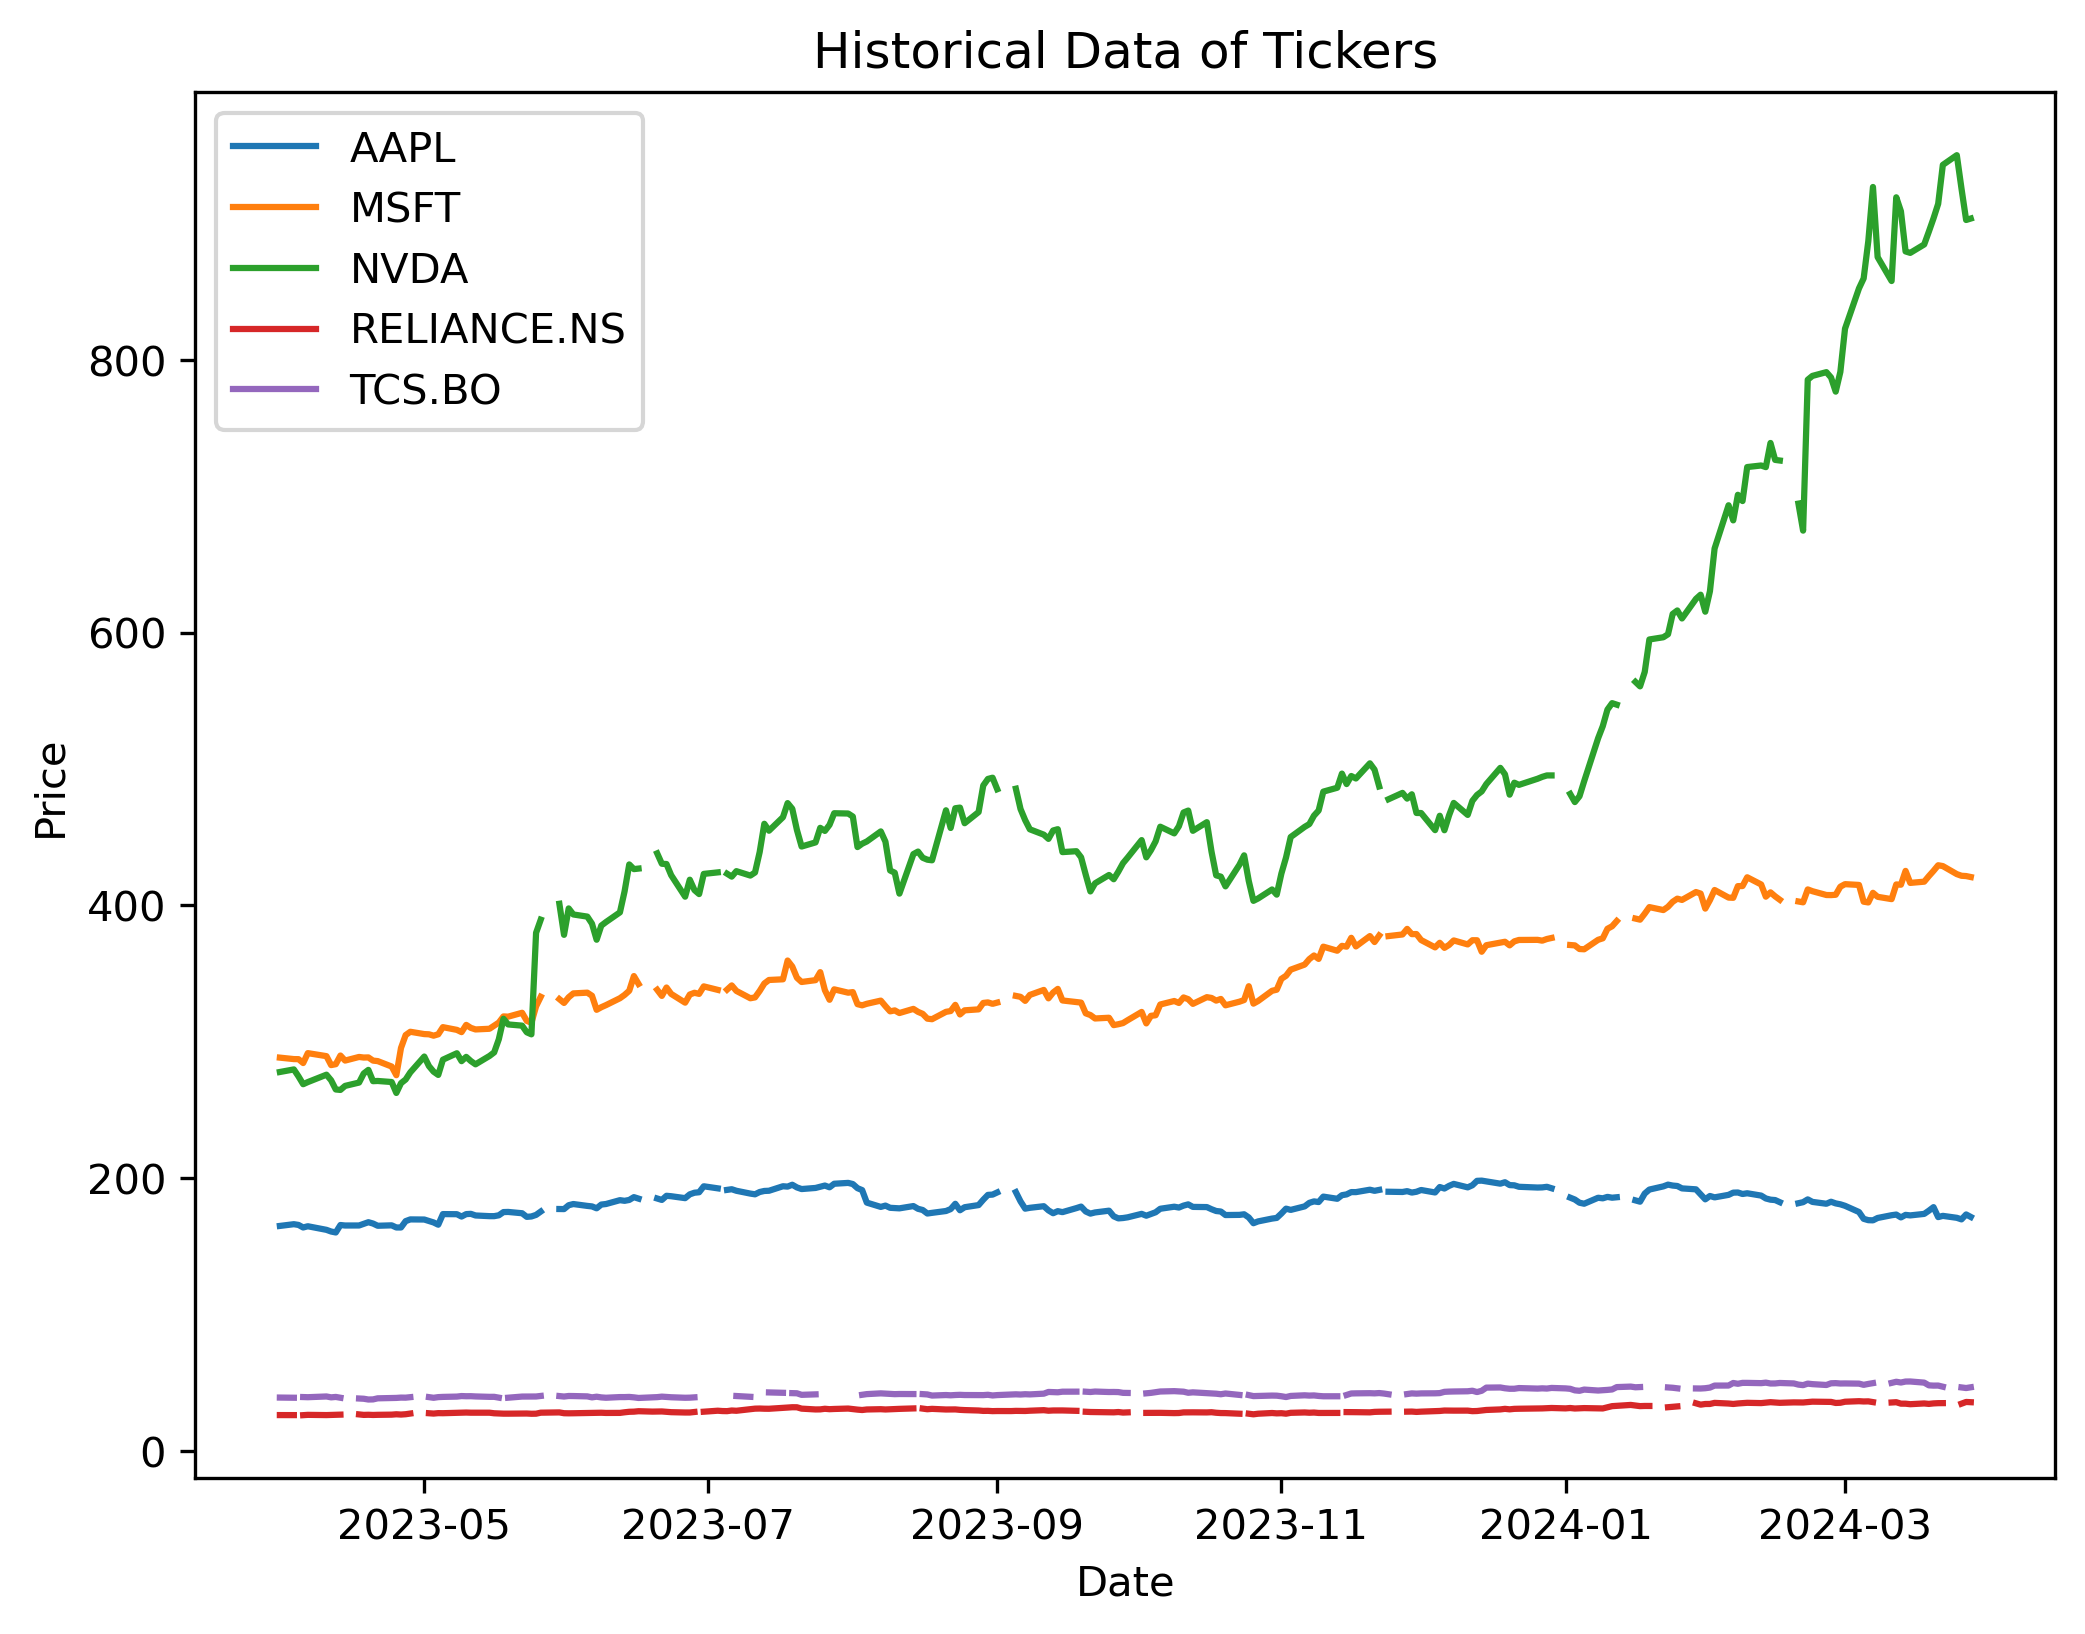

In [48]:
tickers = ["AAPL", "MSFT","NVDA","RELIANCE.NS","TCS.BO"]
plt.figure(figsize=(8, 6), dpi = 300)     
plt.plot(stonks)
plt.title("Historical Data of Tickers")
plt.legend(tickers, loc = "upper left")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

In [49]:
stonks_unified = stonks/stonks.loc[stonks.index[0]]
r = 0.05
stonks_unified["Interest Rate"] = [1*np.exp(r*T/252) for T in range(len(stonks_unified))]

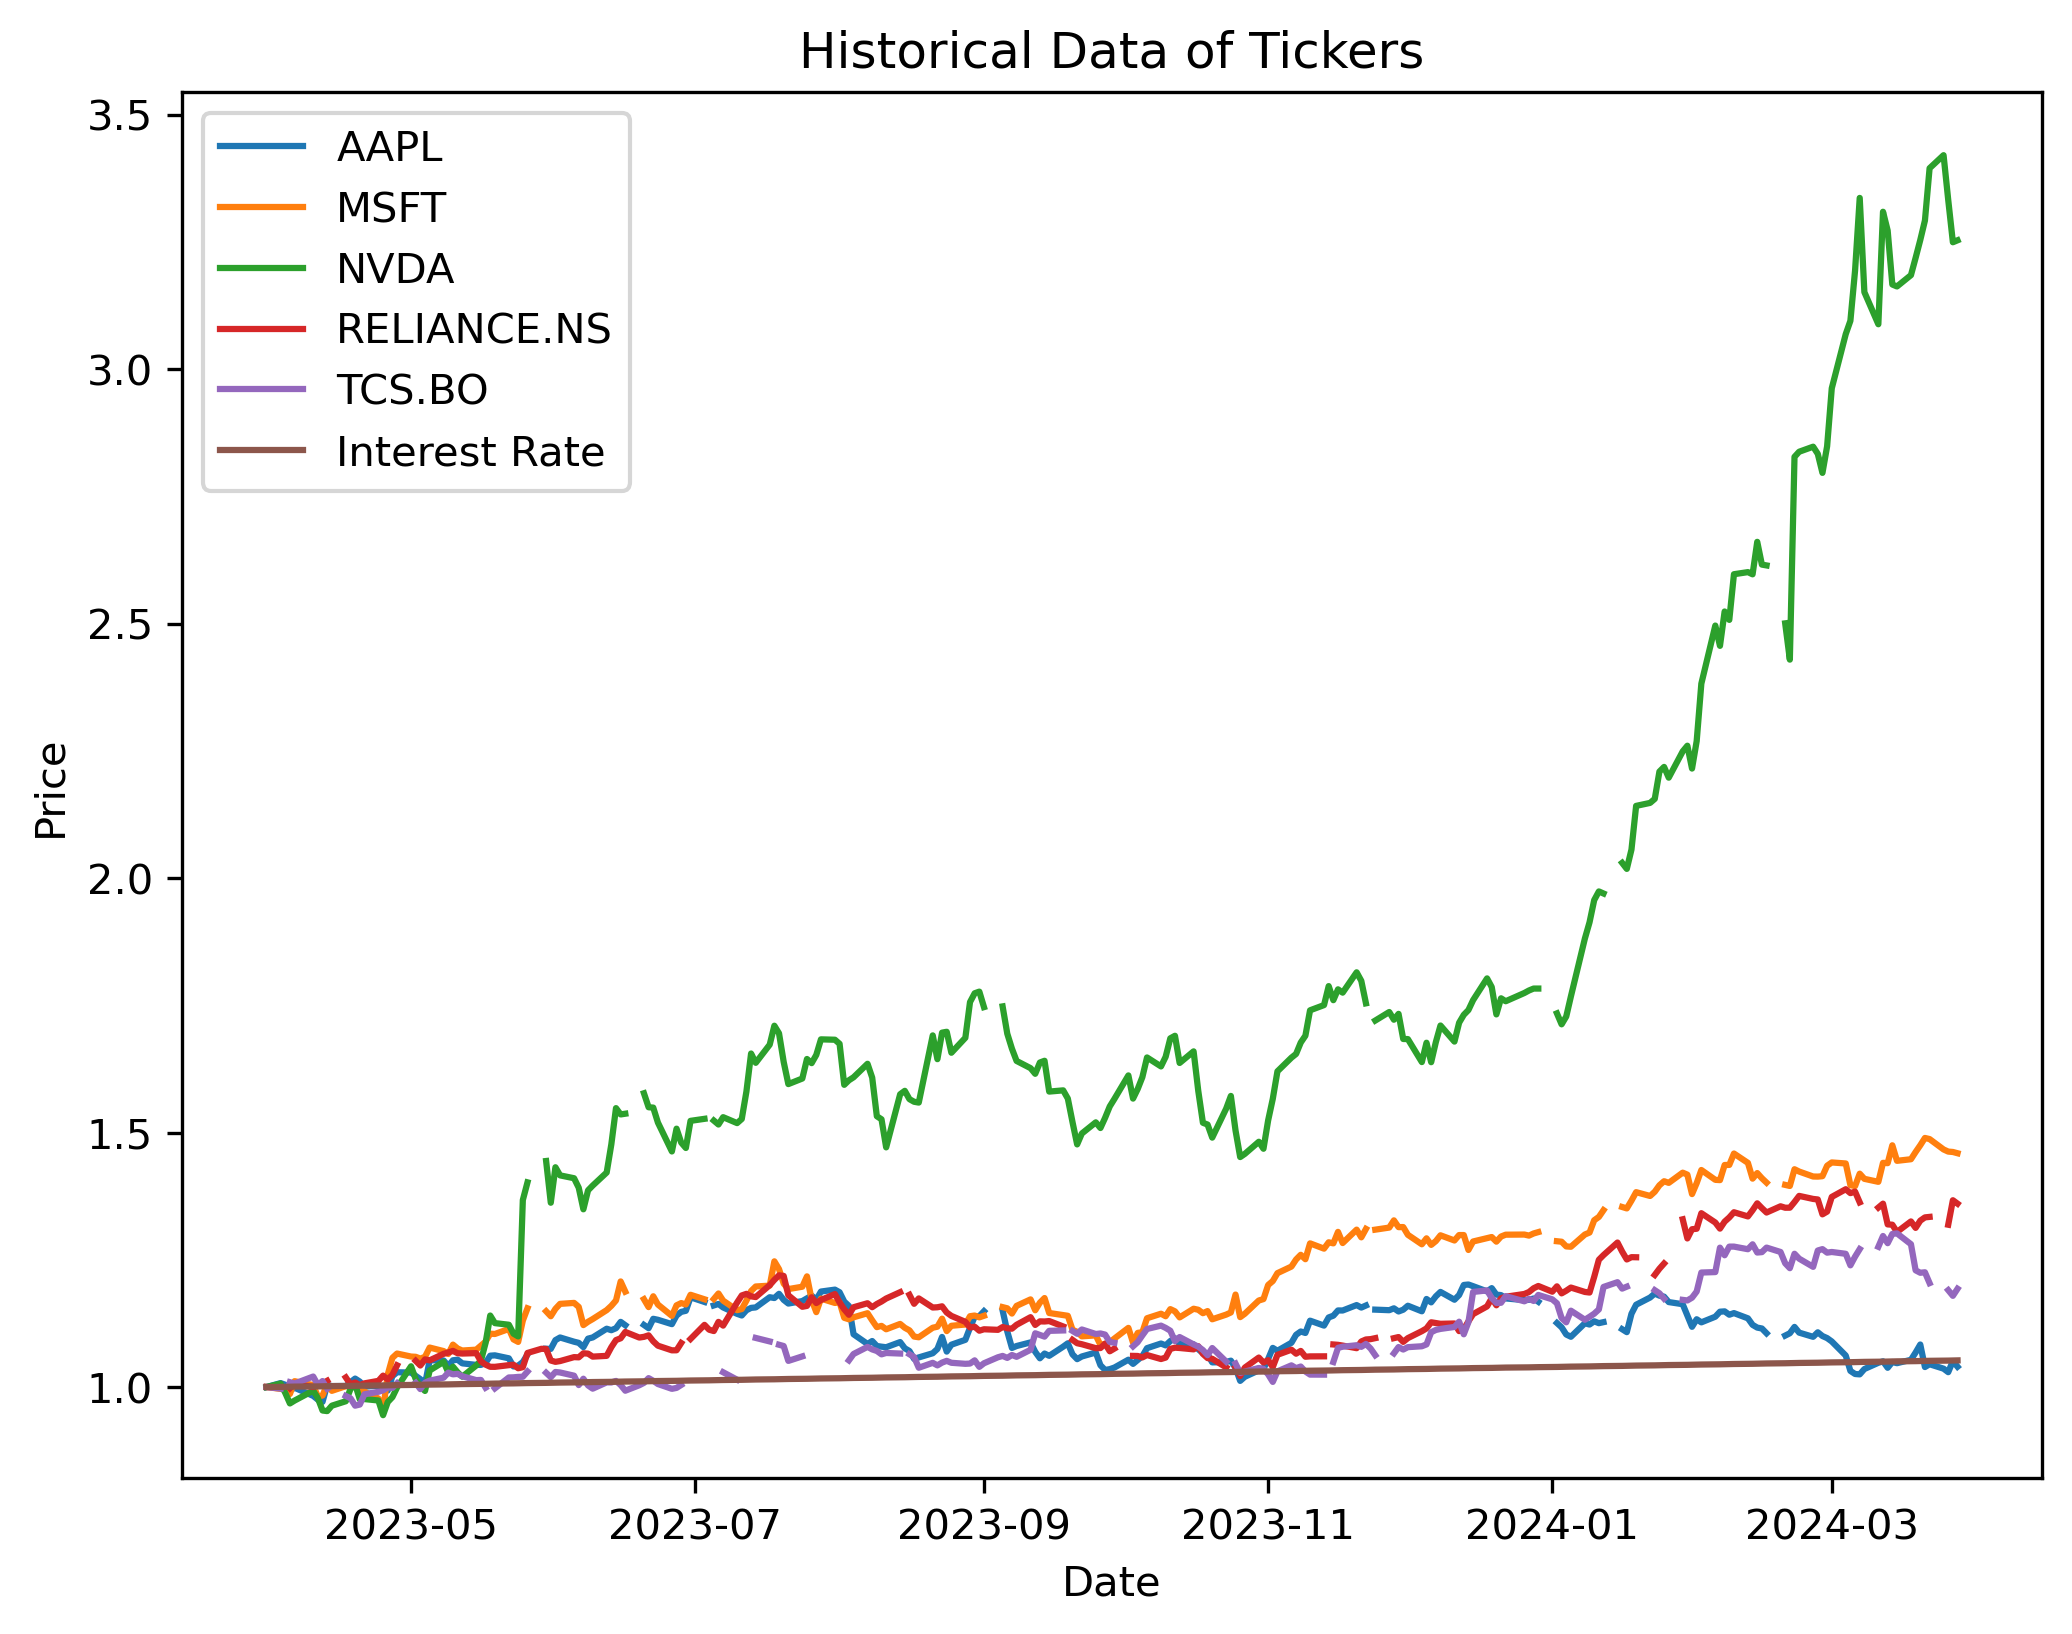

In [50]:
plt.figure(figsize=(8, 6), dpi = 300)     
plt.plot(stonks_unified)
plt.title("Historical Data of Tickers")
plt.legend(tickers+ ["Interest Rate"], loc = "upper left")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

## 2.3: Constructing Portfolios 

__Portfolio 1 :__ 40% AAPL + 50% NVDA + 10% Bonds </br>
__Portfolio 2:__ 70% NVDA + 30% TCS.BO </br>
__Portfolio 3:__ 25% RELIANCE.NS + 75% MSFT </br>

In [51]:
portfolios = pd.DataFrame()
portfolios["Portfolio 1"] = 0.4*stonks_unified["AAPL"]+0.5*stonks_unified["NVDA"]+ 0.1*stonks_unified["Interest Rate"]
portfolios["Portfolio 2"] = 0.3*stonks_unified["TCS.BO"]+0.7*stonks_unified["NVDA"]
portfolios["Portfolio 3"] = 0.25*stonks_unified["RELIANCE.NS"]+0.75*stonks_unified["MSFT"]

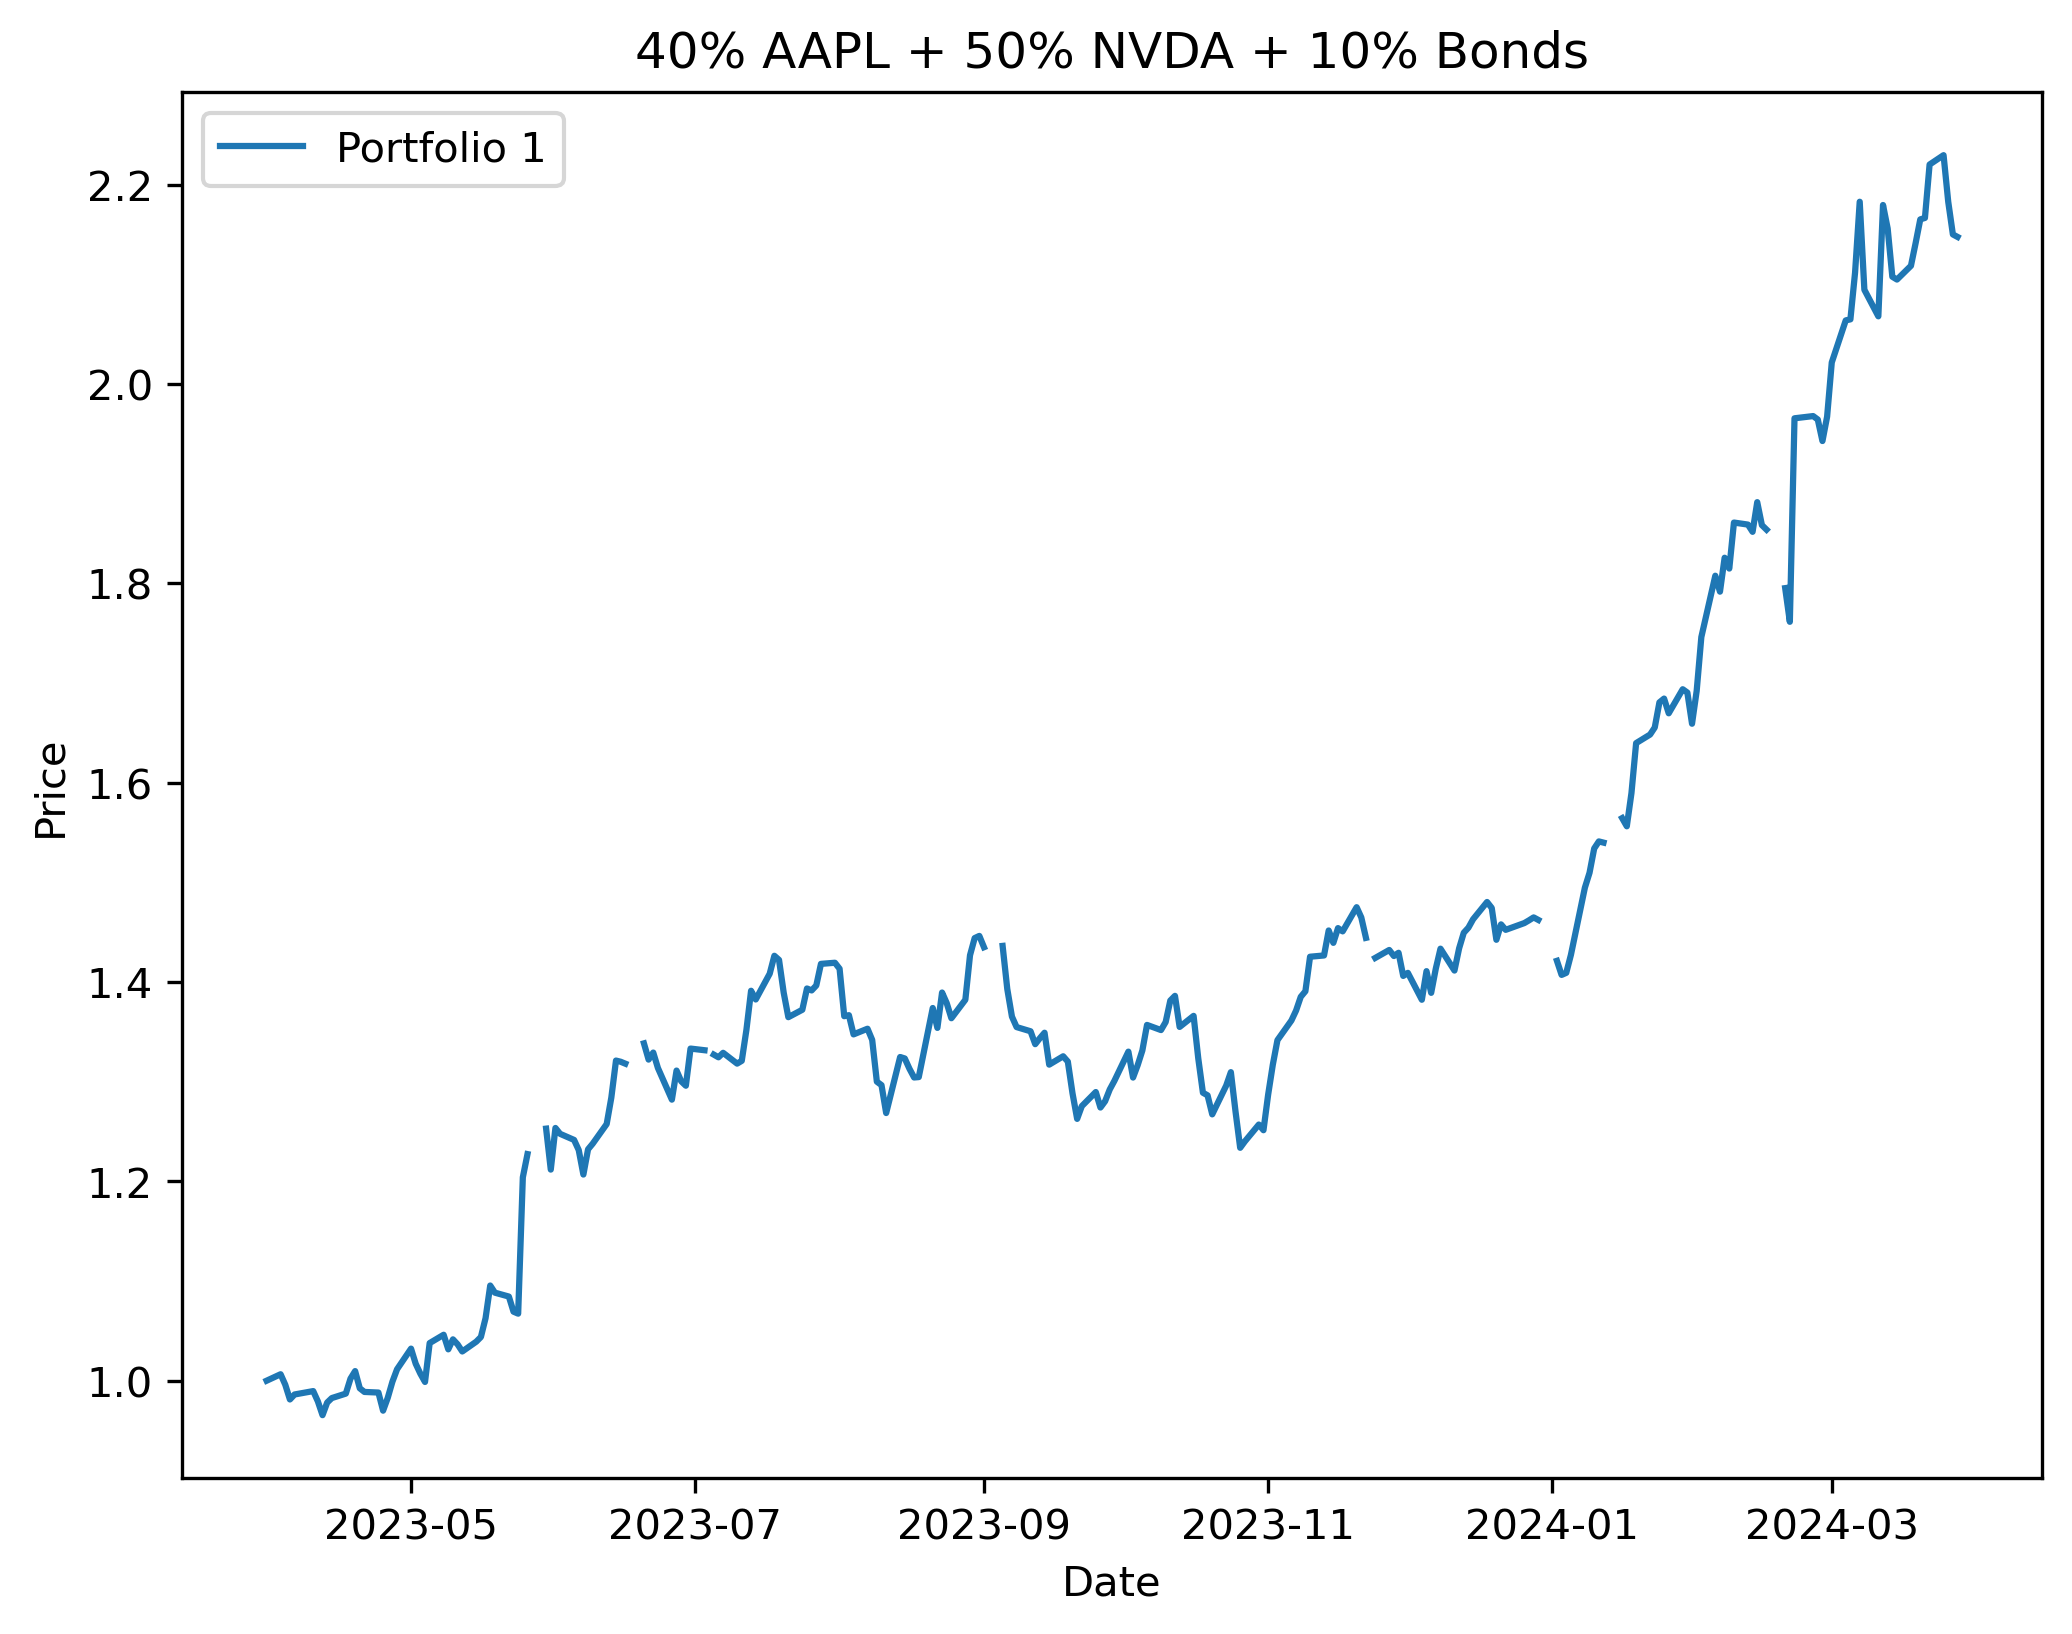

In [52]:
plt.figure(figsize=(8, 6), dpi = 300)     
plt.plot(portfolios['Portfolio 1'])
plt.title("40% AAPL + 50% NVDA + 10% Bonds")
plt.legend(["Portfolio 1"], loc = "upper left")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

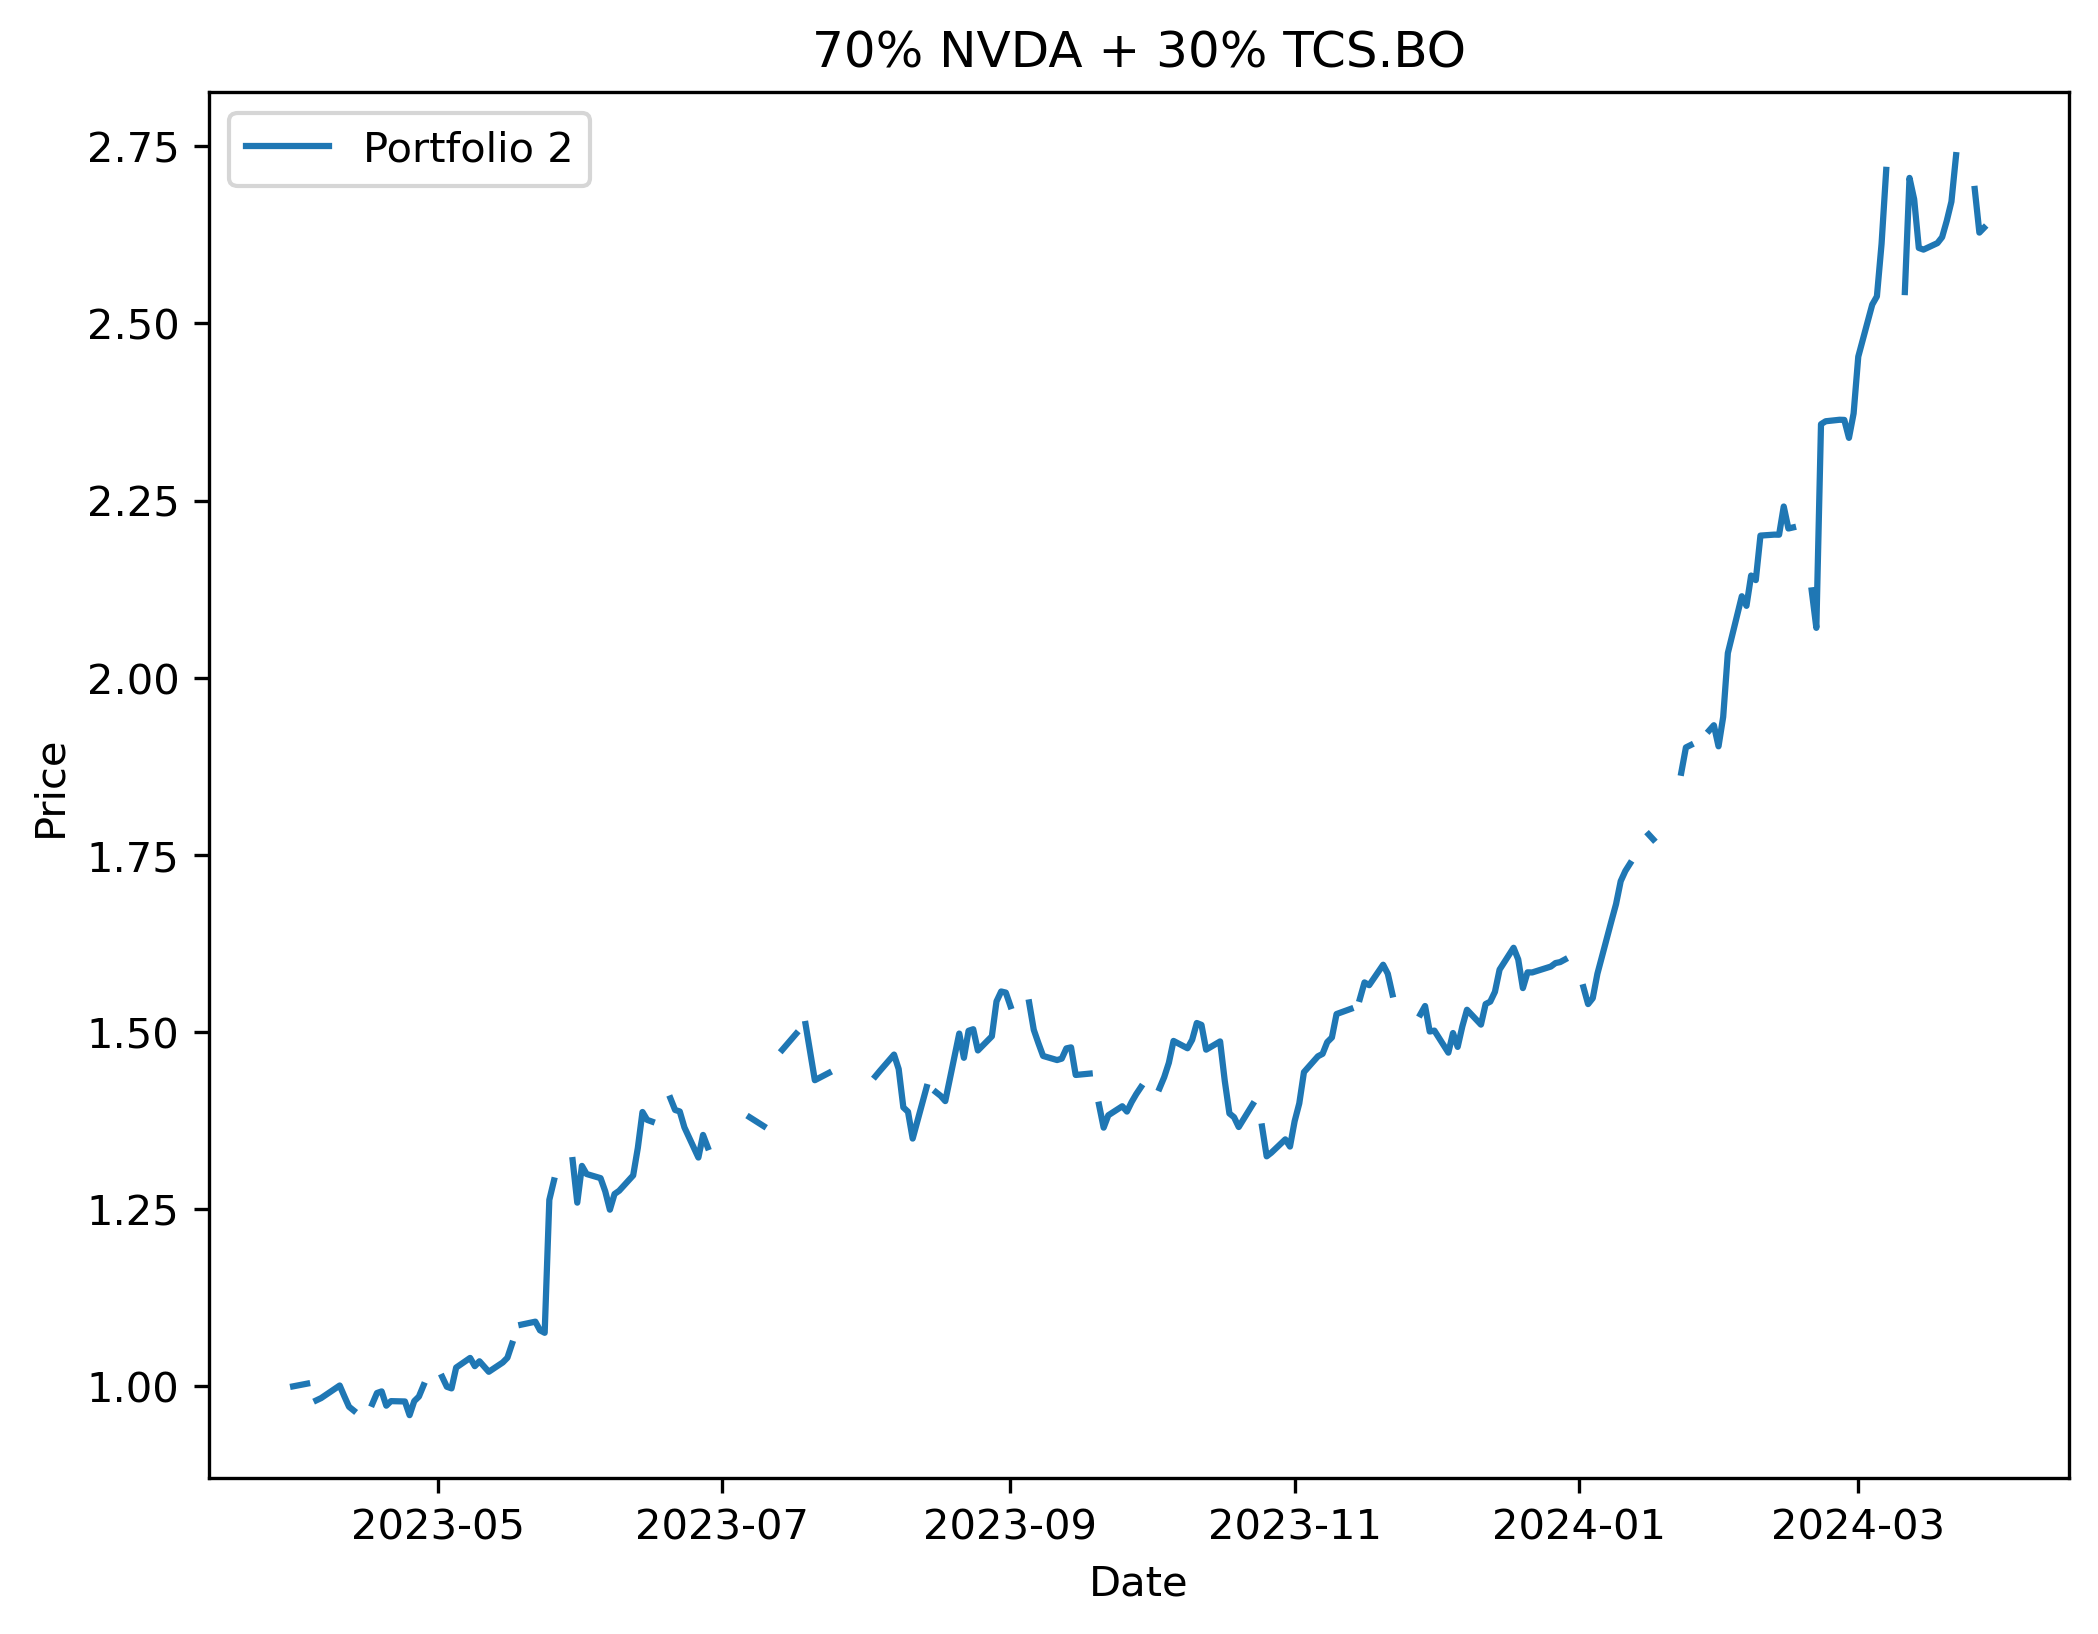

In [53]:
plt.figure(figsize=(8, 6), dpi = 300)     
plt.plot(portfolios['Portfolio 2'])
plt.title("70% NVDA + 30% TCS.BO")
plt.legend(["Portfolio 2"], loc = "upper left")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

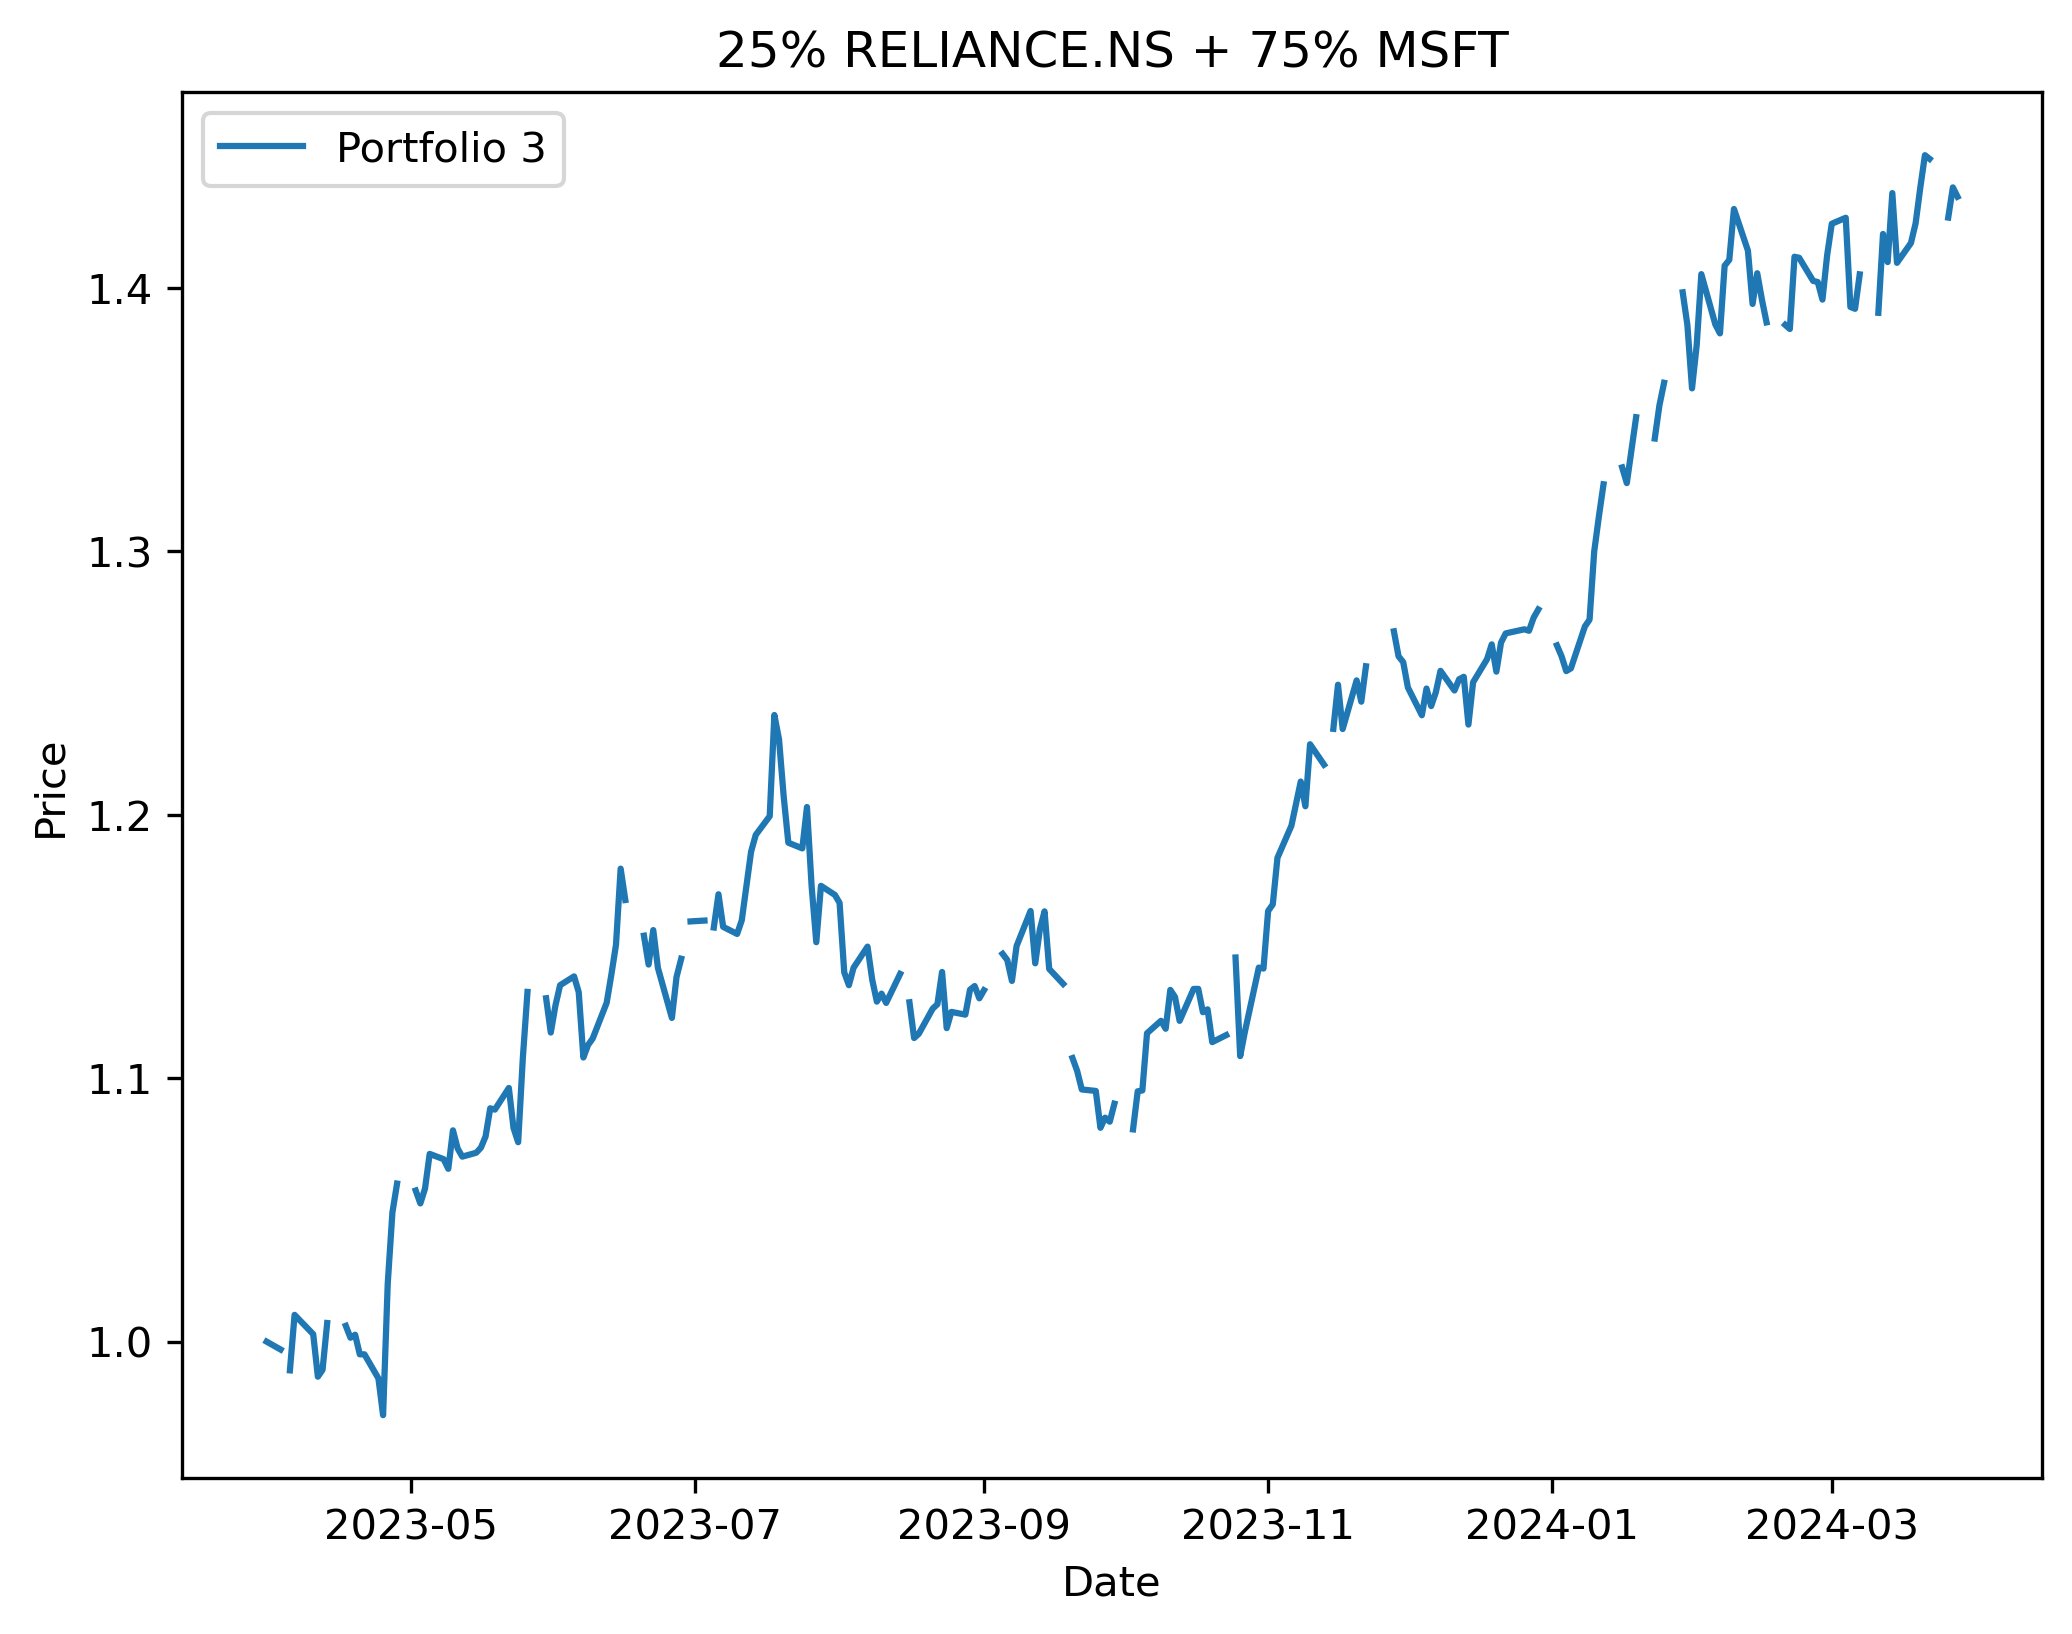

In [54]:
plt.figure(figsize=(8, 6), dpi = 300)     
plt.plot(portfolios['Portfolio 3'])
plt.title("25% RELIANCE.NS + 75% MSFT")
plt.legend(["Portfolio 3"], loc = "upper left")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

## 2.4: Risk-Return Trade Off 

In [55]:
mean = np.mean(portfolios)
stdev = np.std(portfolios)

zscores = pd.DataFrame()
zscores["Portfolio 1"] = (portfolios["Portfolio 1"]- mean[0])/stdev[0]
zscores["Portfolio 2"] = (portfolios["Portfolio 2"]- mean[1])/stdev[1]
zscores["Portfolio 3"] = (portfolios["Portfolio 3"]- mean[2])/stdev[2]

/Users/jiyamaheshwari/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


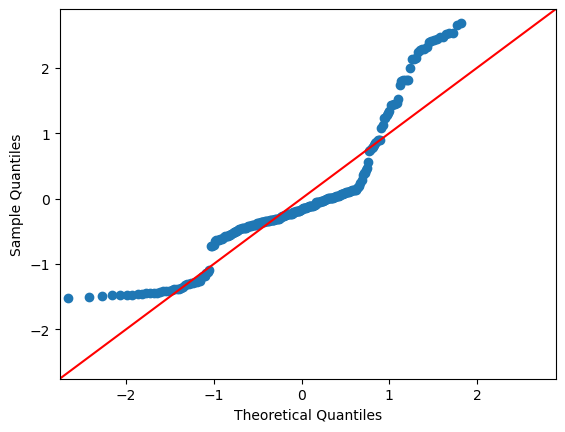

In [56]:
sm.qqplot(zscores["Portfolio 1"], line ='45') 
py.show()

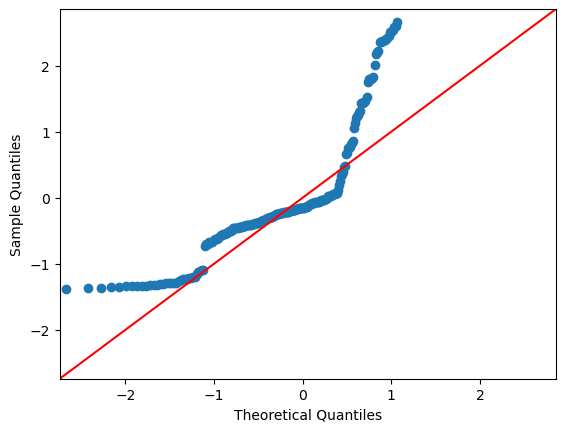

In [57]:
sm.qqplot(zscores["Portfolio 2"], line ='45') 
py.show()

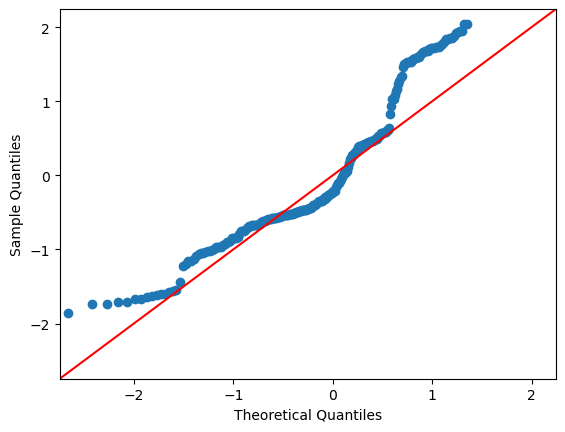

In [58]:
sm.qqplot(zscores["Portfolio 3"], line ='45') 
py.show()

__Based on the 3 Q-Q plots for the portfolios, the data doesn't seem to be following a normal distribution, which is one of the main assumptions for sharpe ratio. Hence we should not opt for that measure. Additionaly maximum drawdown doesn't give us a risk/return ratio. I am opting to use Sortino ratio because it works with data that doesn't follow a normal distribution and provides a risk/return ratio, although only for downside risk.__

In [59]:
def sortino(series, N,rf):
    mean = series.mean() * N -rf
    std_neg = series[series<0].std()*np.sqrt(N)
    return mean/std_neg

p1sortino = sortino(portfolios['Portfolio 1'].pct_change() ,len(stonks),0.05)
p2sortino = sortino(portfolios['Portfolio 2'].pct_change() ,len(stonks),0.05)
p3sortino = sortino(portfolios['Portfolio 3'].pct_change() ,len(stonks),0.05)
print(p1sortino,p2sortino,p3sortino) 

5.161047260930267 5.1956128957033885 3.1086345310521786


__When we assume the real risk free rate to be 5%, the sortino values to the 3 portfolios are 5.161047260930267, 5.1956128957033885 and 3.1086345310521786 respectively.__

## 2.5 : Optimal Portfolio? 

__For risk-averse investors, the 2nd portfolio with 70% NVDA and 30% TCS.BO should be ideal since it has a Sortino ratio above 2 and the highest of 3, which is considered to be a great return to risk ratio. For risk-taking investors, they can choose to go fot the 3rd portfolio, where based on historical data, it still has a return to risk ratio of above 2 but it is lower than the other two portfolios. For a general investor(everyone), they could go for either of the first two portfolios since the return to risk ratio is great and similar, but there isn't an obvious choice for this question since all 3 values presented are above 2 which is considered to be very favourable. Additionally, just the sortino ratio cannot provide a definitive answer and historical data doesn't always accurately predict future gains/losses.__